### Linear Regression
Explain in a few words, linear regression, it's cost fn, etc


In [20]:
%matplotlib inline
from __future__ import division                                                 
import matplotlib.pyplot as plt                                                 
import numpy as np                                                              
import pandas as pd                                                             

In [43]:
def computeCost(X, y, theta):
    J = 1/(2*m) * np.sum(np.square(X.dot(theta) - y))
#     prediction = X.dot(theta)
#     sq_error = np.square(prediction - y)
#     J = 1/(2*m) * np.sum(sq_error)
    return J

In [44]:
def gradientDescent(X, y, theta, alpha, num_iter):
    J_history = np.zeros(num_iter)[:, None]                                    
    for i in range(num_iter):                    
        theta = theta - ((alpha / m) * np.transpose(X).dot((X.dot(theta) - y)))                                          
        J_history[i] = computeCost(X, y, theta)                                 
    return theta, J_history

Theta found by gradient descent: -3.630291, 1.166362
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129
time:  0.303780794144


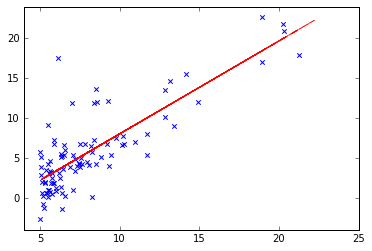

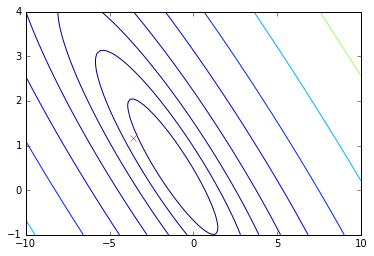

In [70]:
import time
t0 = time.time()
data = pd.read_csv('ex1data1.txt', sep=",", header=None)                        
data.columns = ['X', 'y']                                                       
X = data.X                                                                      
y = data.y                                                                      
m = len(y) 

plt1 = plt.figure().add_subplot(111)
plt.xlim(4,25)
plt.ylim(-4, 24)
plt1.scatter(X, y, marker='x')

#plt.hold
X = data.iloc[:, 0].values                                                      
y = data.iloc[:, 1].values                                                      
X = X[:, None]                                                                  
y = y[:, None]                                                                  
theta = np.zeros(2)[:, None]                                                    
iterations = 1500                                                               
alpha = 0.01                                                                    
X = np.c_[np.ones(X.shape[0]), X]                                               
J = computeCost(X, y, theta)

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

d = X[:, 1]
value = X.dot(theta)

plt1.hold(True)

# plt1 = plt.figure().add_subplot(111)
plt1.plot(d, value, 'r--')

print 'Theta found by gradient descent: %f, %f' %(theta[0], theta[1])

print 'For population = 35,000, we predict a profit of %f' %(np.array([1, 3.5]).dot(theta) * 10000)

print 'For population = 70,000, we predict a profit of %f' %(np.array([1, 7]).dot(theta) * 10000)


theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])[:, None]
        #print t
        J_vals[i][j] = computeCost(X, y, t)
        #print J_vals[i][j]

from mpl_toolkits.mplot3d import Axes3D

#J_vals = J_vals[:, None]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(azim=30)
# ax.invert_yaxis()
# ax.invert_xaxis()
# ax.plot_surface(theta0_vals, theta1_vals, J_vals)

# plt.hold(False)
plt2 = plt.figure().add_subplot(111)
plt2.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, num=20))

plt2.hold(True)
plt2.plot(theta[0], theta[1], 'rx')

t1 = time.time()
print 'time: ', t1-t0